In [1]:
import pandas as pd
import konlpy
import re
from konlpy.tag import Okt
from collections import Counter

#  접기

In [2]:
lst = ['야놀자','부킹닷컴','여기어때']
df = pd.DataFrame()
for i in lst : 
    dt = pd.read_csv(f'./{i}_리뷰_전체.csv')
    df = pd.concat([df,dt])
df
    

,ht_id,date,star,review,month,season
0,1,2021.08.01,8.0,위치며 청결함이며 친절함 무엇 하나 부족함 없음,8,Summer
1,1,2021.08.01,8.0,다만 창문 없는 객실 이용하게 되어 조금 답답했음,8,Summer
2,1,2021.05.02,10.0,재미있게 잘 보내다 갑니다,5,Spring
3,1,2021.05.02,10.0,사실 창문 내다봤을 때 전망 괜찮은 데를 원했는데 딱 그곳으로 배정해 주셔서 넘넘 ...,5,Spring
4,1,2021.05.02,10.0,그리고 와인이랑 샐러드도 넘넘 맛있게 잘 먹었어요,5,Spring
...,...,...,...,...,...,...
288778,386,2022-02-27,10.0,저희 방만 없었던 건지 실수로 누락된 거겠죠,2,Winter
288779,386,2022-02-27,10.0,아직 뭔가 전반적으로 좀 빠진 것도 있고 그런 느낌이었어요,2,Winter
288780,386,2022-02-27,10.0,하지만 너무 깔끔했던 내부가 마음에 들어 재방문할 것 같습니다,2,Winter
288781,386,2022-02-27,10.0,새 건물이라서 깨끗하고 좋았음,2,Winter


In [3]:
good = pd.read_csv('여기어때_리뷰_전체.csv')
good['len'] = good['review'].str.len()

In [8]:
good.sort_values(by='len',ascending=False)['review']

268378    잘쉬었다가요 여기어때에서 말도안되는 글자수이벤트로 아래것붙혀요양해 부탁드려요두유두유...
171994    3줄 중요 포인트 요약 서울의 미니어처 지구촌 이태원 바로 옆과 꼼데가르송 거리에 ...
193805    토미호스텔 2021 2월6일 입실                            ...
280219    까치산에서 제일 좋은 모텔 굿굿 지하철역 가까워요고데기 충전기 신분증 맡기고 빌려야...
208745    여기어때 단독특가 로 갔다온 코트야드 메리어트 서울 보타닉 파크 파크 스위트 숙박 ...
                                ...                        
283897                                                  NaN
283959                                                  NaN
283978                                                  NaN
283979                                                  NaN
285524                                                  NaN
Name: review, Length: 288783, dtype: object

In [3]:
# dt = pd.read_csv('./야놀자_리뷰_전체.csv')
df.dropna(axis=0,inplace=True)
df.drop_duplicates(['review'],inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ht_id,date,star,review,month,season
0,1,2021.08.01,8.0,위치며 청결함이며 친절함 무엇 하나 부족함 없음,8,Summer
1,1,2021.08.01,8.0,다만 창문 없는 객실 이용하게 되어 조금 답답했음,8,Summer
2,1,2021.05.02,10.0,재미있게 잘 보내다 갑니다,5,Spring
3,1,2021.05.02,10.0,사실 창문 내다봤을 때 전망 괜찮은 데를 원했는데 딱 그곳으로 배정해 주셔서 넘넘 ...,5,Spring
4,1,2021.05.02,10.0,그리고 와인이랑 샐러드도 넘넘 맛있게 잘 먹었어요,5,Spring
...,...,...,...,...,...,...
397931,386,2022-02-27,10.0,다른 데는 기본 일회용 칫솔 치약 화장솜 면봉 빗 이런 게 기본으로 구비되어있는데 ...,2,Winter
397932,386,2022-02-27,10.0,화장실에 두루마리 휴지도 없고 이것도 좀 이상했어요,2,Winter
397933,386,2022-02-27,10.0,저희 방만 없었던 건지 실수로 누락된 거겠죠,2,Winter
397934,386,2022-02-27,10.0,아직 뭔가 전반적으로 좀 빠진 것도 있고 그런 느낌이었어요,2,Winter


In [ ]:
# df.to_csv('./서울_리뷰_전체.')

In [4]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [5]:
df[(df['review'].str.contains('굿'))&(df['review'].str.len()<10)&(~df['review'].str.contains('구성비'))]

,ht_id,date,star,review,month,season
435,1,2021.10.31,10.0,굿이에요,10,Autumn
436,1,2021.10.31,10.0,굿,10,Autumn
521,2,2020.10.28,8.0,조식 굿,10,Autumn
937,7,2022.03.08,10.0,굿굿,3,Spring
1393,8,2019.03.19,10.0,굿 기모기모띠,3,Spring
...,...,...,...,...,...,...
286980,384,2023-02-24,10.0,굿굿,2,Winter
287156,384,2023-01-27,10.0,굿늘 다니는곳이죠,1,Winter
287304,384,2023-01-27,10.0,굿굿,1,Winter
288006,386,2022-02-27,10.0,좋았어요 굿굿,2,Winter


In [5]:
# 말뭉치 생성
okt = Okt()  # 명사 형태소 추출 함수
# nouns = okt.nouns(apply_regular_expression(dt['review'][10]))
corpus = "".join(df['review'].tolist())

In [6]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
# print(nouns)

In [65]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
seoul_hotel_stopwords = ['서울', '서울시', '호텔', '리뷰', '숙소', '여행', '트립','그거','이거','자체','무엇','가요','제주','제주도','제주시','서귀포','서귀포시']
for word in seoul_hotel_stopwords:
    stopwords.append(word)

In [31]:
# counter = Counter(nouns)
# available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
# bow_vect = vect.fit_transform(dt['review'].tolist())
# word_list = vect.get_feature_names_out()
# count_list = bow_vect.toarray().sum(axis=0)

In [35]:
len(nouns)

410016

In [66]:
nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거

In [67]:
korean = pd.Series(nouns).value_counts()

In [68]:
word_cnt = pd.DataFrame(korean).reset_index()
word_cnt.rename(columns={'index':'word',0:'cnt'},inplace=True)

In [69]:
word_cnt_100 = word_cnt[word_cnt['cnt']>=100]

In [64]:
word_cnt_100.to_csv('wordsCount.csv',index=False)
word_cnt_100.to_excel('wordsCount.xlsx',index=False)

In [62]:
word_lst = word_cnt_100['word']

In [10]:
rev = pd.read_csv('./야놀자_리뷰_전체.csv')
rev.dropna(axis=0,inplace=True)

# 키워드 추출

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 

In [10]:
dt = pd.read_csv('word_count.csv')
dt

,word,cnt
0,친절,15294
1,위치,12271
2,직원,11854
3,이용,8760
4,객실,8574
...,...,...
789,토요코인,100
790,신속,100
791,김포,100
792,등록,100


In [35]:
dt.iloc[:400].to_excel('word_400.xlsx',index=False)

In [43]:
dt.iloc[400:].to_excel('word_400_2.xlsx', index=False)

In [11]:
dt_100 = dt.iloc[100:]

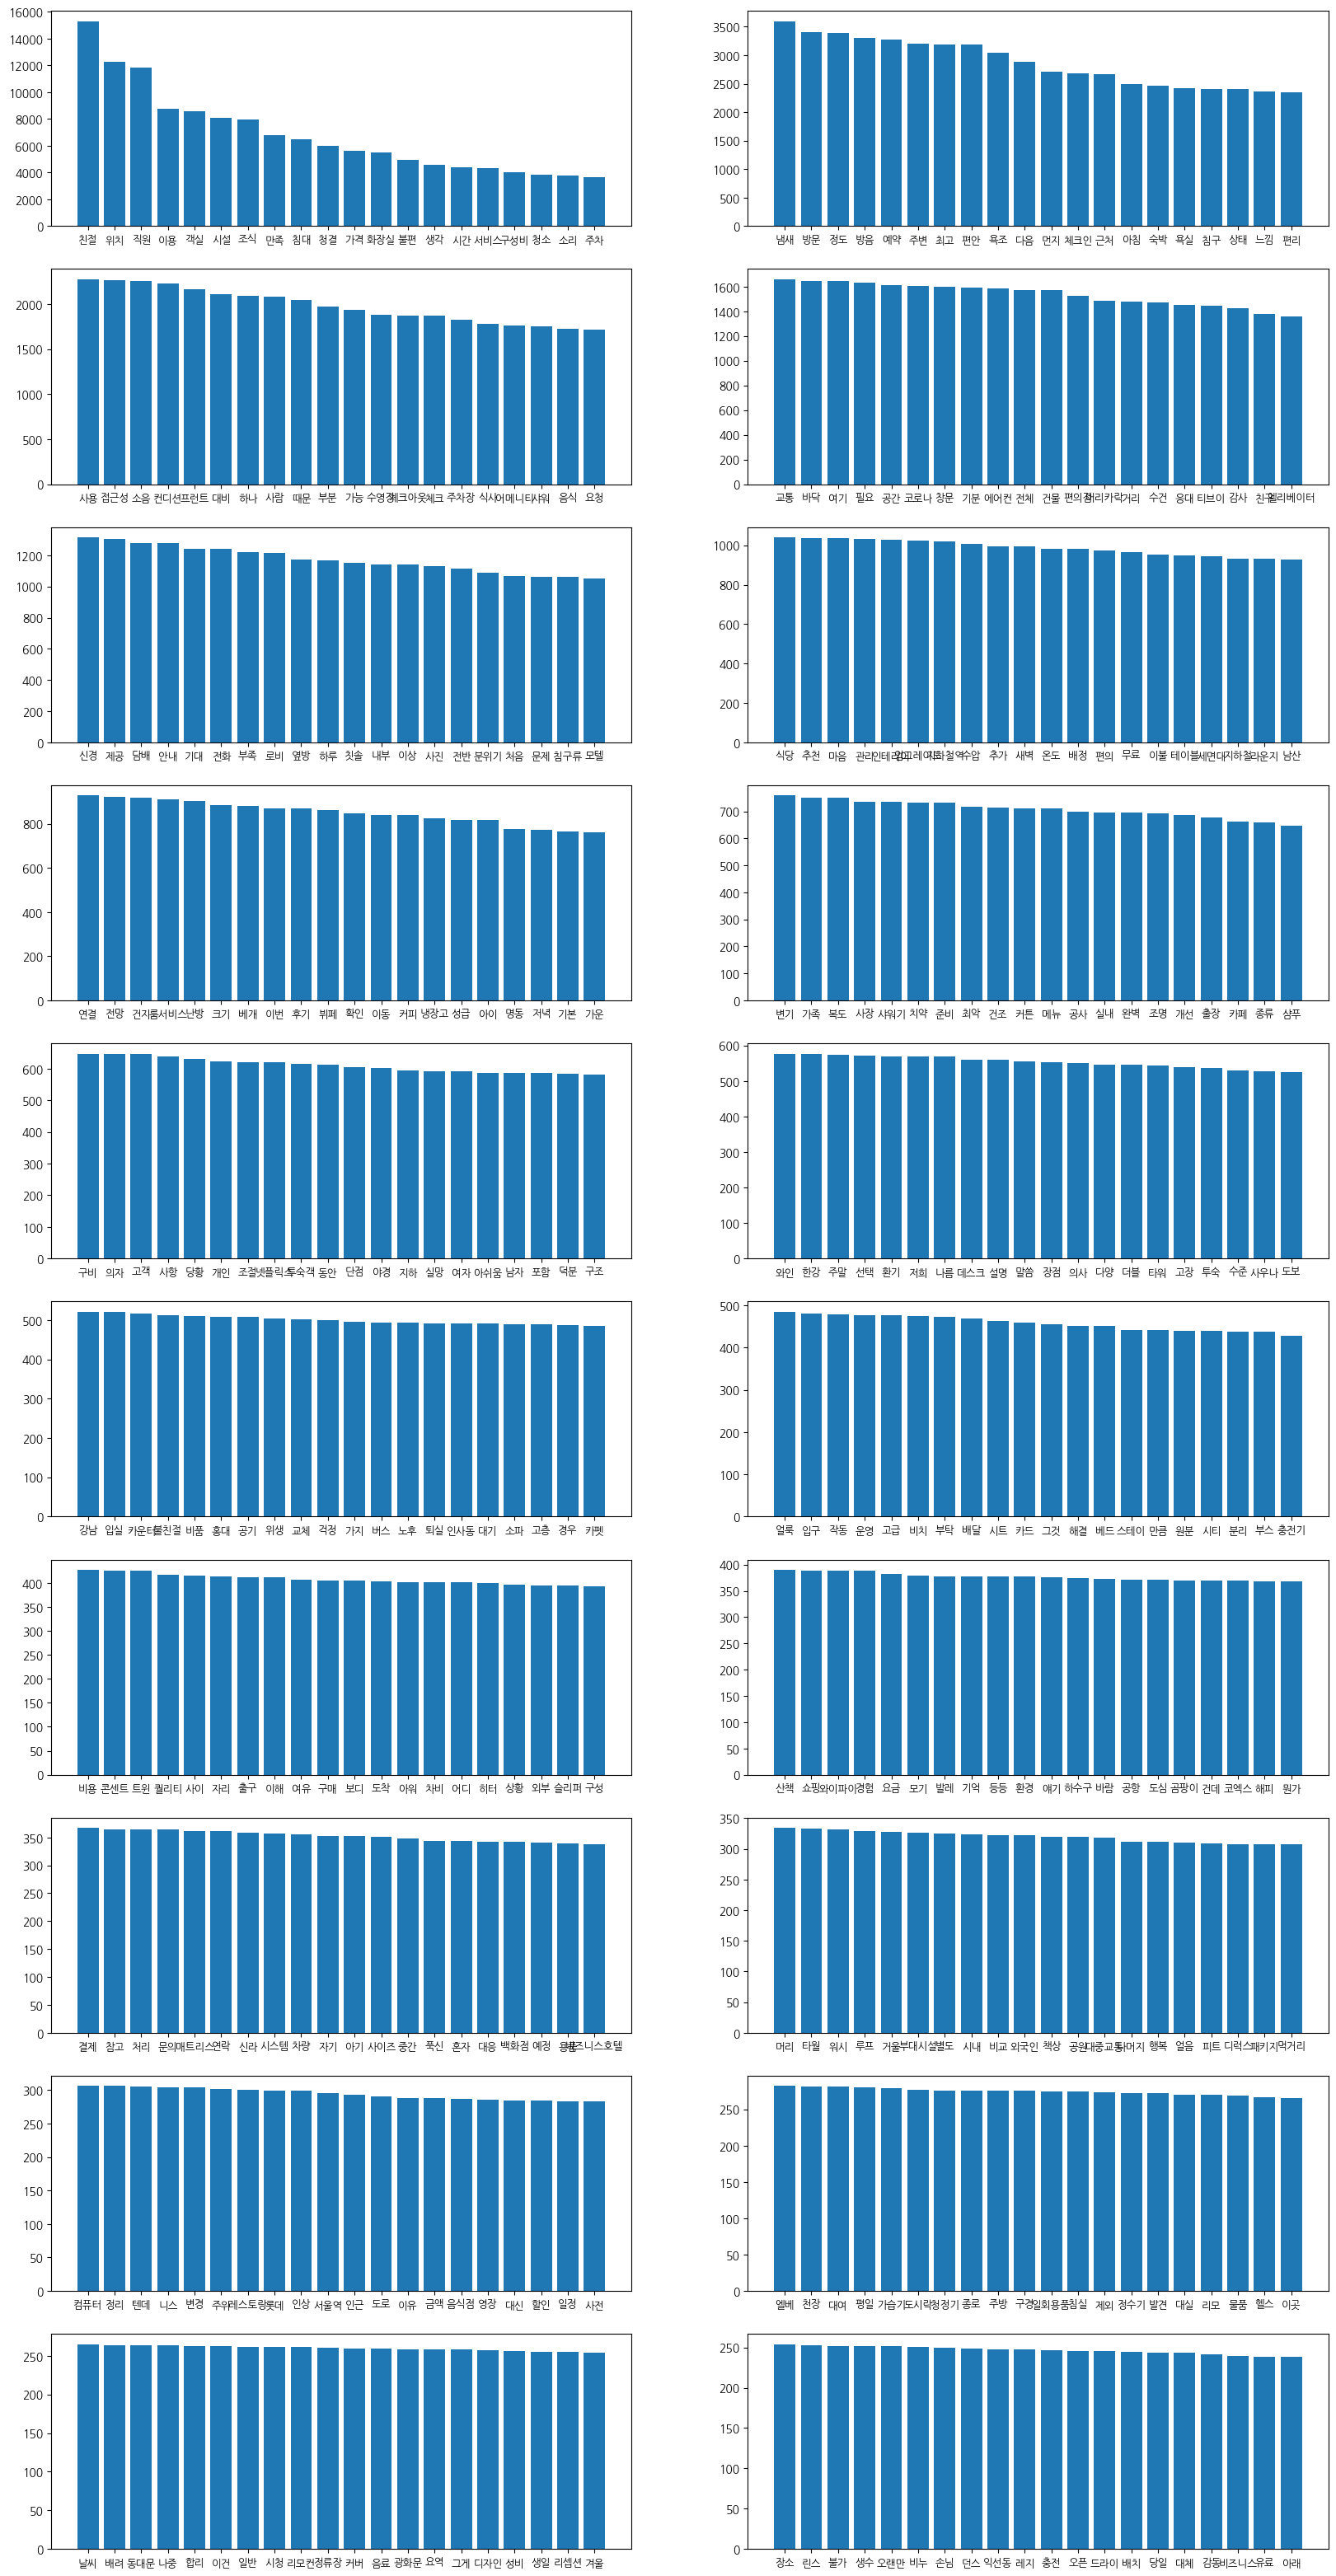

In [39]:
plt.figure(figsize=(20,40))
for i,num in zip(range(0,21),range(0,len(dt.iloc[:400]),20)):
    plt.subplot(10,2,i+1)
    plt.bar(dt.iloc[num:num+20]['word'],dt.iloc[num:num+20]['cnt'])
    # plt.ylim(100,15000)
    plt.xticks(fontsize=9)